# PX402 - Physics Project - Finding neutrino interaction vertices in imaging detectors at DUNE

Just testing out some of the functionality of the uproot commands. First task is to get an event displayed using the uproot_io module!

In [6]:
#Imports the uproot module with the Events and View classes

from uproot_io import Events, View
import numpy as np

In [7]:
import os
#A save function produced by Andy to enable us to save plots
def save_plot(fig, directory, filename):
    if not os.path.exists(directory):
        os.mkdir(directory)
    fig.savefig(f'{directory}/{filename}.png', bbox_inches='tight', dpi=200, facecolor='w')
    fig.savefig(f'{directory}/{filename}.jpg', bbox_inches='tight', dpi=200)
    fig.savefig(f'{directory}/{filename}.svg', bbox_inches='tight', dpi=200)

In [8]:
# Interaction type lookup - this is just a look up table that contains all of the possible interaction types as assigned
# to a number.

import csv
interaction_dictionary = {}
with open('interactions.csv') as f:
    reader = csv.DictReader(f)
    for row in reader:
        key = int(row.pop('Idx'))
        interaction = row.pop('Interaction')
        interaction_dictionary[key] = interaction
        
print(interaction_dictionary[3])
print(interaction_dictionary[6])
#print("This is the whole interaction dictionary:\n", interaction_dictionary)
# The entire interaction dictionary has 202 unique entries, with some corresponding to specific known interactions,
# and others corresponding to unknown interactions such as 200: other interaction and 201: all interactions

CCQEL_MU_P_P_P
CCQEL_E


In [9]:
# Let us collect the data from a single root file
events = Events("CheatedRecoFile_1.root")
view_u = View(events, "u")
view_v = View(events, "v")
view_w = View(events, "w")

u_x = view_u.x
u_z = view_u.z
u_adc = view_u.adc
u_truevtx_z = view_u.true_vtx_z
u_truevtx_x = view_u.true_vtx_x

v_x = view_v.x
v_z = view_v.z
v_adc = view_v.adc
v_truevtx_z = view_v.true_vtx_z
v_truevtx_x = view_v.true_vtx_x

w_x = view_w.x
w_z = view_w.z
w_adc = view_w.adc
w_truevtx_z = view_w.true_vtx_z
w_truevtx_x = view_w.true_vtx_x

In [10]:
print(view_w.z[1])
print(view_w.x[1])
print(view_w.adc[1])

[330.22525 330.70425 331.18326 ... 410.21826 412.61325 360.40225]
[-358.0046  -358.06848 -358.01654 ... -308.83585 -313.34482 -258.20264]
[56.082302 37.667736 41.082325 ... 49.65992  61.171406 99.95399 ]


In [6]:
from uproot_io import Events, View
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

def view_creator(event_orientation, event_number, thresholding_on_off=True):
    adc_new = []
    z_new = []
    x_new = []
    if event_orientation == "u":
        view_u = View(events, "u")
        z1_view_u = view_u.z[event_number]
        x1_view_u = view_u.x[event_number]
        adc1_view_u = view_u.adc[event_number]
        if thresholding_on_off == True:
            threshold_value = np.mean(adc1_view_u) - 0.3 * np.std(adc1_view_u)
            for i in range(len(adc1_view_u)):
                if adc1_view_u[i] > threshold_value:
                    adc_new.append(adc1_view_u[i])
                    z_new.append(z1_view_u[i])
                    x_new.append(x1_view_u[i])
            plt.scatter(z_new, x_new, c=adc_new, cmap='jet', s=15)
            plt.title(event_orientation+str(event_number))
            plt.show()
        else:  
            plt.scatter(z1_view_u, x1_view_u, c=adc1_view_u, cmap='jet', s=15)
            plt.title(event_orientation+str(event_number))
            plt.show()
        
    if event_orientation == "v":
        view_v = View(events, "v")
        z1_view_v = view_v.z[event_number]
        x1_view_v = view_v.x[event_number]
        adc1_view_v = view_v.adc[event_number]
        if thresholding_on_off == True:
            threshold_value = np.mean(adc1_view_v) - 0.3 * np.std(adc1_view_v)
            for i in range(len(adc1_view_v)):
                if adc1_view_v[i] > threshold_value:
                    adc_new.append(adc1_view_v[i])
                    z_new.append(z1_view_v[i])
                    x_new.append(x1_view_v[i])
                    
            plt.scatter(z_new, x_new, c=adc_new, cmap='jet', s=15)
            plt.title(event_orientation+str(event_number))
            plt.show()
        else:
            plt.scatter(z1_view_v, x1_view_v, c=adc1_view_v, cmap='jet', s=15)
            plt.title(event_orientation+str(event_number))
            plt.show()
    
    if event_orientation == "w":
        view_w = View(events, "w")
        z1_view_w = view_w.z[event_number]
        x1_view_w = view_w.x[event_number]
        adc1_view_w = view_w.adc[event_number]
        if thresholding_on_off == True:  
            threshold_value = np.mean(adc1_view_w) - 0.3 * np.std(adc1_view_w)
            for i in range(len(adc1_view_w)):
                if adc1_view_w[i] > threshold_value:
                    adc_new.append(adc1_view_w[i])
                    z_new.append(z1_view_w[i])
                    x_new.append(x1_view_w[i])
                
            plt.scatter(z_new, x_new, c=adc_new, cmap='jet', s=15)
            plt.title(event_orientation+str(event_number))
            plt.show()
        else:
            plt.scatter(z1_view_w, x1_view_w, c=adc1_view_w, cmap='jet', s=15)
            plt.title(event_orientation+str(event_number))
            plt.show()
    return

In [11]:
def scatter_points(plane, event_number):
    if plane=="u":
        true_x = view_u.true_vtx_x[event_number]
        z_view = view_u.z[event_number]
        x_view = view_u.x[event_number]
        adc_view = view_u.adc[event_number]
        true_z = view_u.true_vtx_z[event_number]
    elif plane=="v":
        true_x = view_v.true_vtx_x[event_number]
        z_view = view_v.z[event_number]
        x_view = view_v.x[event_number]
        adc_view = view_v.adc[event_number]
        true_z = view_v.true_vtx_z[event_number]
    elif plane=="w":
        true_x = view_w.true_vtx_x[event_number]
        z_view = view_w.z[event_number]
        x_view = view_w.x[event_number]
        adc_view = view_w.adc[event_number]
        true_z = view_w.true_vtx_z[event_number]
    else:
        print("PLane not u,v,w")
    return x_view, z_view, adc_view, true_z, true_x

In [8]:
print(scatter_points("u", 10))

(array([ 25.585955 ,  35.592216 ,   4.4574933,   4.457092 ,   4.417749 ,
         4.3872423,   4.3981967,   4.359071 ,   4.311127 ,   4.3145027,
         4.283335 ,   4.232088 ,   4.230356 ,   4.2303057,   4.1416693,
         4.1497254,   4.1375194,   4.0815496,   4.1069655,   4.0672007,
         4.0119357,   4.004675 ,   4.0121746,   4.0114055,  13.924208 ,
        13.5321245,   4.042317 ,   4.197388 ,   4.24326  ,  14.44302  ,
        -3.9917226,  -3.9716463,  -4.0440435,  -4.0550895,  -4.1421785,
        -4.1542854,  -4.2100163,  -4.2431498,  -4.291526 ,  -4.3442187,
        -4.386386 ,  -4.423664 ,  -4.4628115,  -4.536329 ,  -4.557279 ,
        -4.6329827,  -4.65607  ,  -4.7004566,  -4.7584443,  -4.6987953,
        -4.8257604,  -4.314014 ,  -4.865721 ,  -4.9307957,  -4.9460335,
        -4.9922395,  -5.030132 ,  -5.102002 ,  -5.12767  ,  -5.172943 ,
        -5.2020144,  -5.2376485,  -5.281878 ,  -5.33824  ,  -5.3537498,
        -5.4141555,  -5.421615 ,  -5.4962535,  -5.503813 ,  -5.

In [12]:
def threshold(plane, event_number, no_std):
    x_view, z_view, adc_view = scatter_points(plane, event_number)
    
    mean = np.average(adc_view)
    std = np.std(adc_view)

    x_view = x_view[(mean - no_std * std < adc_view)]
    z_view = z_view[(mean - no_std * std < adc_view)]
    adc_view = adc_view[(mean - no_std * std < adc_view)]
    
    return x_view, z_view, adc_view

In [26]:
def least_z(plane, event_number, no_std=1, thresholding=False):
    x_view, z_view, adc_view, true_z, true_x = scatter_points(plane, event_number)
    
    if thresholding == True:
        mean = np.average(adc_view)
        std = np.std(adc_view)
        x_view = x_view[(mean - no_std * std < adc_view)]
        z_view = z_view[(mean - no_std * std < adc_view)]
        adc_view = adc_view[(mean - no_std * std < adc_view)]
    
    min_z = np.amin(z_view)
    ind = np.where(min_z)[0]
    min_x = x_view[ind]
    #print("Least z prediction for vertex location: (x-position, z-position, plane)=", min_x, min_z, plane)
    return min_x, min_z, true_x, true_z, ind

In [59]:
def plotter(plane, event_number, thresholding=False, no_std=1, least_zz=False, anglesplit=False, no_sectors=8, centre=0):
    

    #threshold data to an input number of std
    if thresholding:
        x_view, z_view, adc_view = threshold(plane, event_number, no_std)
    else:
        x_view, z_view, adc_view, true_z, true_x = scatter_points(plane, event_number)


    
    plt.scatter(z_view, x_view, c=adc_view, cmap="viridis", s=2)
    if least_zz == True:
        min_x, min_z, ind, true_z, ind = least_z(plane, event_number)
        plt.plot(true_z, true_x, 'ro', markersize=5)
    

    
    plt.title(str(plane)+" plane")
    plt.xlabel("z")
    plt.ylabel("x")
    return plt.show()
    


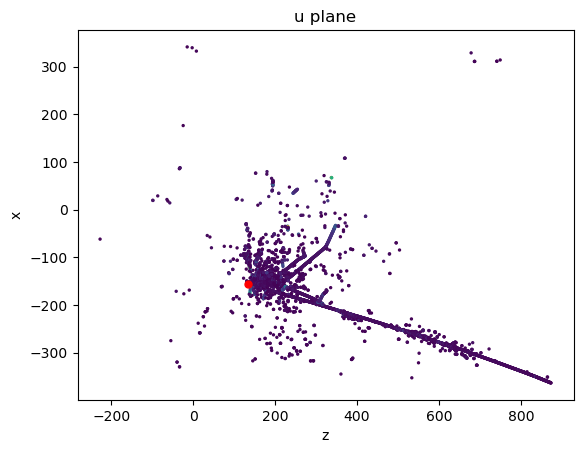

In [91]:
plotter("u", 12, False, 1, True, False)

In [14]:
def least_z_difference(min_x, min_z, actual_x, actual_z):
    return np.sqrt((min_x - actual_x) ** 2 + (min_z - actual_z) ** 2)

histogram_results = []
#for i in range(len(view_u.z)):
for i in range(100):
    min_x, min_z, true_x, true_z, ind = least_z("u", i, 1, True)
    histogram_results.append(float(least_z_difference(min_x, min_z, true_x, true_z)))
    print(i)
    print(histogram_results[i])

0
25.69027328491211
1
455.0745849609375
2
124.47893524169922
3
57.44903564453125
4
0.5298810601234436
5
396.8193664550781
6
227.0359344482422
7
38.99857711791992
8
232.0148162841797
9
693.7059936523438
10
0.18071220815181732
11
37.023197174072266
12
361.07452392578125
13
28.822952270507812
14
218.1908416748047
15
20.510282516479492
16
79.06758117675781
17
94.66065979003906
18
33.07807159423828
19
149.34616088867188
20
0.1787431389093399
21
117.60242462158203
22
60.042057037353516
23
79.10332489013672
24
415.24761962890625
25
217.28286743164062
26
172.99920654296875
27
280.20904541015625
28
3.1003987789154053
29
1.045239806175232
30
90.93042755126953
31
23.626920700073242
32
66.9854736328125
33
215.15431213378906
34
42.8883056640625
35
30.500102996826172
36
109.43709564208984
37
202.97622680664062
38
390.6608581542969
39
62.762428283691406
40
193.84317016601562
41
855.6585083007812
42
0.060429275035858154
43
140.27484130859375
44
70.7406997680664
45
3.5458569526672363
46
87.345153808593

455.0745849609375


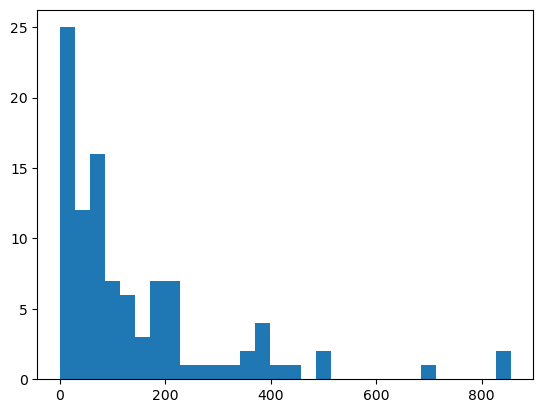

In [15]:
#def histogram_for_accuracy():
print(histogram_results[1])
plt.hist(histogram_results, bins=30)
plt.show()


In [16]:
print(np.percentile(histogram_results, 68))

155.53579284667978


In [5]:
def least_z_scores(plane, event):
    x_view, z_view, adc_view, true_z, true_x = scatter_points(plane, event)
    z_scores = [None] * len(x_view)
    min_z = np.amin(z_view)
    ind = np.where(min_z)[0]
    min_x = x_view[ind]
    for i in range(len(x_view)):
        z_scores[i] = z_view[ind] - z_view[i]
    
    score_max = max(z_scores)
    score_min = min(z_scores)
    
    normalised_scores = (z_scores - score_min) / (score_max - score_min)
    
    return normalised_scores

In [18]:
from tqdm import tqdm
def pdf_least_z_true(plane, events, plot=True):
    total_signal = []
    total_back = []
    total_r_sig = []
    total_r_back = []
    
    for ev in tqdm(events):
        signal = []
        back = []
        AoI_x, AoI_z, AoI_adc, Zvert_true_place, Xvert_true_place = scatter_points(plane, ev)
        normalised_score = least_z_scores(plane, ev)
        normalised_score = normalised_score.tolist()
        #print(normalised_score)
        r = [None] * len(AoI_z)
        for i in range(len(AoI_z)):
            r[i] = ( (AoI_z[i]-Zvert_true_place)**2 + (AoI_x[i]-Xvert_true_place)**2 )**0.5
            #change kill ring to lower
            if r[i] < 4:
                signal.append(normalised_score[i][0])
            else:
                back.append(normalised_score[i][0])
        total_signal.extend(signal)
        total_back.extend(back)
    
    weights_signal = np.ones(len(total_signal))
    weights_signal /= np.sum(weights_signal)
    
    weights_back = np.ones(len(total_back))
    weights_back /= np.sum(weights_back)
    
    if plot:
        
        plt.clf()
        x = plt.hist(total_signal,20, color='b', alpha=0.5, weights=weights_signal)
        title = plt.title("Signal")
        plt.show()
        
        plt.clf()
        y = plt.hist(total_back,20, color='r', alpha=0.5, weights=weights_back)
        title = plt.title("Background")
        plt.show()
        
    return signal, back, x, y

In [14]:
import pandas as pd 
import random
#sample = random.sample(range(0, len(u_x)), 6000)
#all_events = list(range(0, len(u_x)))

#signal, back, x, y = pdf_least_z_true("u", sample, plot=True)
#signal = np.array(signal)
#back = np.array(back)

In [ ]:
'''
pd.DataFrame(signal).to_csv("signal_lz_raw.csv")
pd.DataFrame(back).to_csv("back_lz_raw.csv")
pd.DataFrame(x).to_csv("signal_lz_hist_test.csv")
pd.DataFrame(y).to_csv("back_lz_hist_test.csv")
'''

In [2]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx], idx

def importpdf(filename):
    df = pd.read_csv(filename)
    df = df.fillna(0)
    data = df.values
    return data[0][1:], data[1][1:]

def normalisepdfs(signal_data_path, background_data_path):
    background_hist_values, background_bin_values = importpdf(background_data_path)
    background_hist_values = np.nan_to_num(background_hist_values)
    background_hist_values = background_hist_values.astype(np.float64)
    background_bin_values = background_bin_values.astype(np.float64)
    background_bin_values = np.nan_to_num(background_bin_values)
    
    signal_hist_values, signal_bin_values = importpdf(signal_data_path)
    signal_hist_values = np.nan_to_num(signal_hist_values)
    signal_hist_values = signal_hist_values.astype(np.float64)
    signal_bin_values = signal_bin_values.astype(np.float64)
    signal_bin_values = np.nan_to_num(signal_bin_values)
    
    #print(background_hist_values, signal_hist_values)
    total_hist_values = background_hist_values + signal_hist_values
    #print("\n", total_hist_values)
    
    normalised_background = background_hist_values[:-1] / total_hist_values[:-1]
    normalised_signal = signal_hist_values[:-1] / total_hist_values[:-1]
    
    return normalised_signal, signal_bin_values[:-1], normalised_background, background_bin_values[:-1]



In [3]:
import scipy as sp
def calculate_likelihood_lz(plane, event, vertex):
    score = least_z_scores(plane, event)[vertex]
    norm_signal, signal_bin, norm_background, background_bin = normalisepdfs("signal_lz_hist.csv", "back_lz_hist.csv")
    interpolated_function = sp.interpolate.interp1d(signal_bin, norm_signal, kind="cubic", fill_value='extrapolate')
    prob = interpolated_function(score)
    return prob

In [15]:
print(calculate_likelihood_lz("u", 12, 13))

[0.51384713]
